<a href="https://colab.research.google.com/github/babuyashwanth/deeplearning_ann/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
X = dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [5]:
Y = dataset[['Exited']]

In [6]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
X = pd.concat([X,geography,gender],axis = 1)

In [8]:
X =X.drop(['Geography','Gender'],axis =1)

In [9]:
##splitting the data set

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
#feature scalling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [13]:
import keras

In [14]:
from keras.models import Sequential
from keras.layers import ReLU,LeakyReLU,ELU
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
classifier = Sequential()

In [16]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [17]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [18]:
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [19]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 16s 3ms/step - loss: 0.6241 - accuracy: 0.6642 - val_loss: 0.5291 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5016 - accuracy: 0.7987 - val_loss: 0.5017 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4947 - accuracy: 0.7919 - val_loss: 0.4911 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4747 - accuracy: 0.8006 - val_loss: 0.4834 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4605 - accuracy: 0.8012 - val_loss: 0.4770 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4724 - accuracy: 0.7857 - val_loss: 0.4720 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4557 - accuracy: 0.8009 - val_loss: 0.4676 - val_accuracy: 0.795

In [25]:
y_pred = classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [27]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)

In [28]:
print(score)

0.8445


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


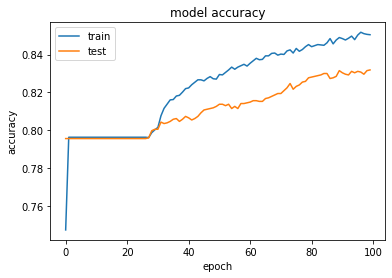

In [31]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

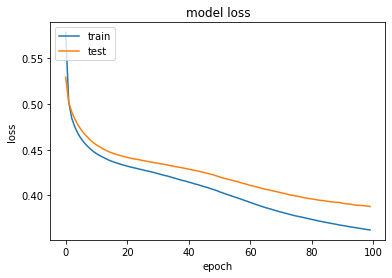

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()